In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("Medical cost.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Column Details : bmi - Body Mass Index

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## EDA

<Axes: >

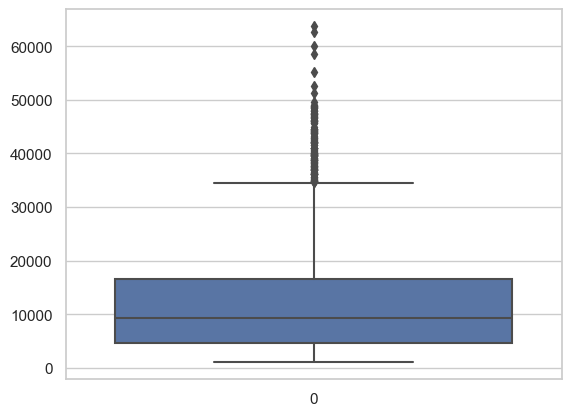

In [13]:
sns.set_theme(style='whitegrid')
sns.boxplot(df['charges'])

<Axes: >

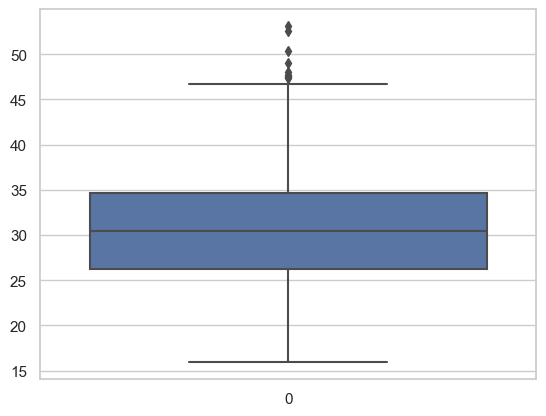

In [14]:
sns.boxplot(df['bmi'])

In [15]:
df[['sex','age']].groupby('sex').agg(['mean', 'count']) #(agg - aggregate)

age      
             mean count
sex                    
female  39.503021   662
male    38.917160   676

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
df[['sex','children']].groupby('sex').agg(['mean'])

,children
,mean
sex,
female,1.074018
male,1.115385


<Axes: xlabel='age', ylabel='bmi'>

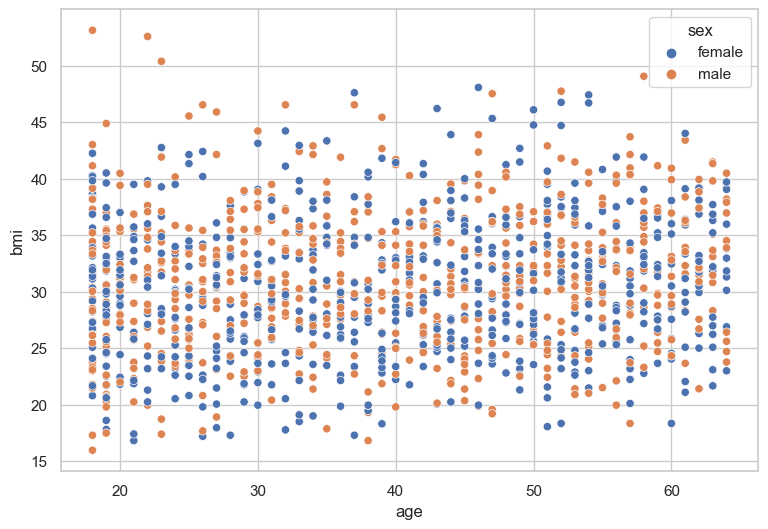

In [24]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='age', y='bmi', hue='sex')

<Axes: xlabel='age', ylabel='charges'>

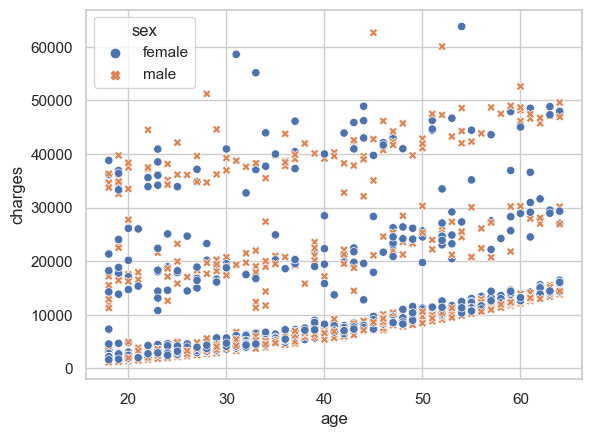

In [25]:
sns.scatterplot(data=df, x='age', y='charges', hue='sex', style='sex')

<Axes: xlabel='age', ylabel='charges'>

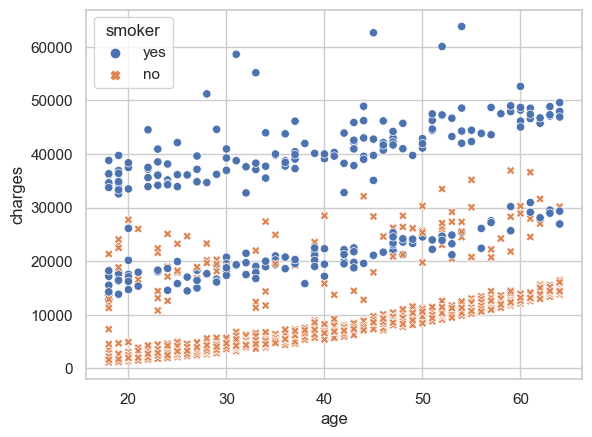

In [28]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', style='smoker')

### Remove Outliers

In [29]:
df = df[df['bmi'] < 47]
df.shape

(1329, 7)

In [30]:
df['smoker'].value_counts()

no     1058
yes     271
Name: smoker, dtype: int64

In [31]:
df['region'].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

In [32]:
df['sex'].value_counts()

male      670
female    659
Name: sex, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name, le.classes_)
    return le.transform(feat)

In [37]:
name_list = ['sex','smoker','region']

In [38]:
for name in name_list:
    df[name] = label_encoded(df[name])

sex ['female' 'male']
smoker ['no' 'yes']
region ['northeast' 'northwest' 'southeast' 'southwest']


In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

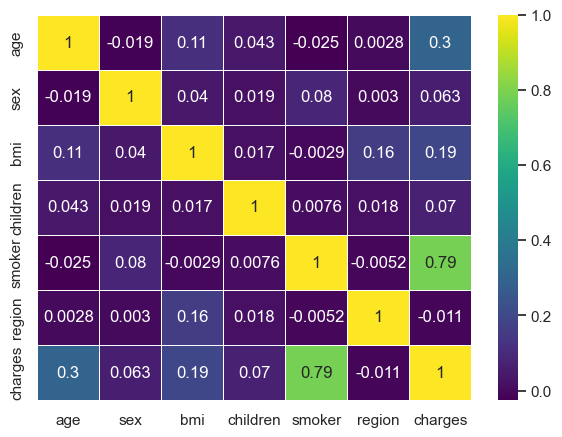

In [41]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True, cmap='viridis',linewidths=.5)

## Model Building

In [42]:
X = df.drop(['charges'],axis=1)
Y = df['charges']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [48]:
rf = RandomForestRegressor(n_estimators=250, n_jobs= -1)

In [49]:
#Fit
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)

In [50]:
#Checking the Accuracy
rf_accuracy = round(rf.score(X_train,Y_train)*100,2)
print(round(rf_accuracy, 2) , '%')

97.68 %


In [51]:
rf_accuracy1 = round(rf.score(X_test, Y_test)*100,2)
print(round(rf_accuracy1, 2), '%')

83.04 %


In [53]:
#Save the model

import pickle

save_model = pickle.dump(rf,open('model.pkl','wb'))